# Fantasy Football Data: A data scientist's attempt at picking the perfect team

Welcome to this interactive Python notebook dedicated to the captivating realm of fantasy football data investigation! In this notebook, we will embark on a journey to explore the intricate relationship between various factors and our primary target variable: "total_points." If you have a passion for Football, data analysis, or both, you're in for a treat!

## Notebook Highlights

1. **Getting Acquainted with the Dataset**: Let's begin by loading and acquainting ourselves with the dataset that will be the cornerstone of our analysis. Our dataset comprises a rich collection of statistics from fantasy football players, encompassing essential details like player positions, team, minutes played, goals scored, assists, and more.

2. **Feature Selection and Crafting**: To uncover the factors that significantly influence a player's fantasy performance, we'll first identify key features that are likely to impact our target variable, "total_points." Additionally, we'll explore the possibility of creating new features to capture nuanced insights.

3. **Diving into Exploratory Data Analysis (EDA)**: Exploratory Data Analysis is pivotal in comprehending data distributions, relationships, and trends. Through visualizations and initial analyses, we will unearth valuable insights into correlations, distributions, and potential anomalies.

4. **Unveiling Statistical Insights**: Our exploration will transcend visualizations, as we employ statistical methods to quantify relationships between different variables. From correlation analysis to hypothesis testing, this section will lay a sturdy statistical foundation for our investigation.


Upon concluding this notebook, you will not only possess a deeper comprehension of the diverse factors influencing a football player's fantasy performance but also acquire practical skills encompassing data investigation, visualization, statistical analysis, all within the exciting context of football.

Whether your aim is to strategize for the best fantasy team or understand a little more about data science, let's get started by taking a look at some of the data we are going to be working with! ⚽📊📈


## 1. Getting to know our data 

Gaining access to fantasy football data can sometimes be challenging, Lucky for you I have compiled a library of functions that should get all of the data you could ever want and need about a player!

We will start the notebook by importing in the relevant librarys we need as seen bellow:

In [1]:
from fpl_data.player_data import *
from fpl_data.models import *
from fpl_data.evals import *
import matplotlib.pyplot as plt 
import seaborn as sns
import math 

Now that we have imported the library we can start to grab some of the data we need. The first thing I would do is take a look at the static data that gets updated each gameweek. 

To do this lets use the method **get_static_data()**

In [2]:
get_static_data()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,...,546,88,518,52,534,53,242,41,0.00,0.0
1,NaN,NaN,58822,0,0,0,0,0,2,0.5,...,601,164,372,126,390,134,258,101,0.00,0.0
2,0.0,0.0,153256,0,0,-1,1,0,3,0.0,...,513,272,494,176,511,185,448,146,0.00,0.0
3,NaN,NaN,438098,0,0,-1,1,0,3,4.2,...,139,90,73,38,26,14,379,119,0.00,0.0
4,NaN,NaN,226597,0,0,-2,2,0,2,1.5,...,324,34,234,77,240,74,26,7,0.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,NaN,NaN,87835,0,0,-1,1,0,2,-0.5,...,498,118,484,189,502,196,307,120,0.00,0.0
710,NaN,NaN,231480,0,0,0,0,0,2,1.5,...,402,87,561,216,575,221,669,222,0.00,0.0
711,NaN,NaN,593001,0,0,0,0,0,3,1.2,...,231,149,675,286,682,288,695,292,0.00,0.0
712,NaN,NaN,531363,0,0,0,0,0,4,0.6,...,470,81,601,67,612,68,605,85,0.00,0.0


Now this is in a format that is not great to work with luckily I have built a function to clean that data and also map up some of the values so that they can be understood by humans. Also to keep consistency as this dataset will change weekly I am going to read the static data from a csv :) 

In [3]:
df = pd.read_csv('data/raw_static.csv')
df = clean_static_data(df)

Now that we have some of this seasons data it would be good to understand what relationship our points have had with each of the variables so far. Lets build out a few plots so that we can try to understand a little bit about our target variable total_points

In [4]:
print("Total points earned so far this season: " + str(df['total_points'].sum()))
print("Average points earned so far this season: " + str(df['total_points'].mean()))
print("Total number of players: " + str(df['id'].shape[0]))
print("Total number of teams: " + str(df['team_code'].drop_duplicates().shape[0]))
print("Average cost: " + str(df['now_cost'].mean()))
print("Min cost: " + str(df['now_cost'].min()))
print("Max cost: " + str(df['now_cost'].max()))

Total points earned so far this season: 2112
Average points earned so far this season: 3.087719298245614
Total number of players: 684
Total number of teams: 20
Average cost: 49.26900584795322
Min cost: 40
Max cost: 140


<AxesSubplot: >

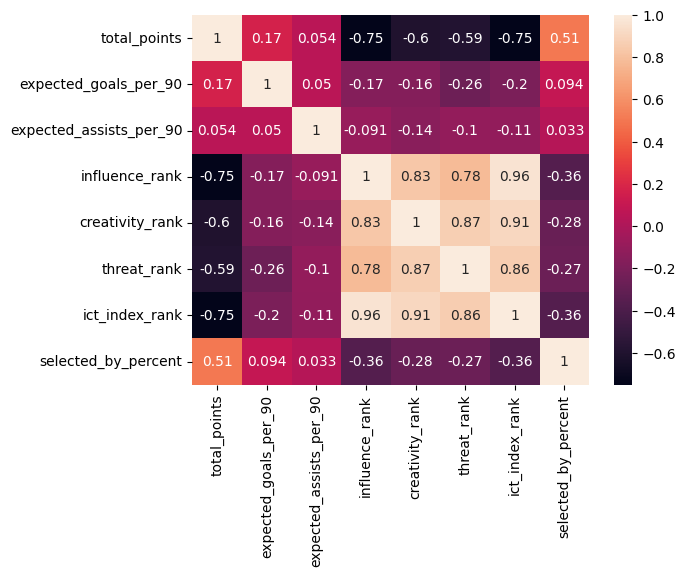

In [5]:
var_list = ['total_points','expected_goals_per_90','expected_assists_per_90','influence_rank',
                'creativity_rank','threat_rank','ict_index_rank','selected_by_percent']
sns.heatmap(df[var_list].corr(),annot=True)

## Feature details

As we delve into the correlation between each variable, a clear pattern emerges. Both "influence rank" and "selected_by_percentage" stand out as potentially pivotal components for our model to yield precise predictions.

Before we venture deeper, let's gain a comprehensive understanding of our current features. Below is an inventory of the variables, along with corresponding definitions:

1. **expected_goals_per_90**: Anticipated number of goals a player is expected to score per 90 minutes of play.
2. **expected_assists_per_90**: Estimated count of assists a player is projected to provide per 90 minutes of play.
3. **influence_rank**: This rank quantifies a player's impact on a match—an essential metric in calculating the ICT (Influence, Creativity, Threat) Index.
4. **creativity_rank**: Measuring a player's creativity during a game, this rank significantly contributes to the ICT Index calculation.
5. **threat_rank**: Reflecting the likelihood of a player scoring or assisting, this rank plays a crucial role in computing the ICT Index.
6. **ict_index_rank**: The ICT Index serves as a yardstick for assessing a fantasy football player's prowess. A higher rank often indicates better performance.
7. **selected_by_percent**: Represented as a value between 0 and 1, this metric indicates the proportion of fantasy team owners who have included the player in their team for the week.

As we move forward, harnessing the power of these insights will undoubtedly lead us to a more robust and accurate prediction model.

Now that we understand a little more about each of our current features it would be good to get some more plots to see how we can potentially identify a great player to be in our side

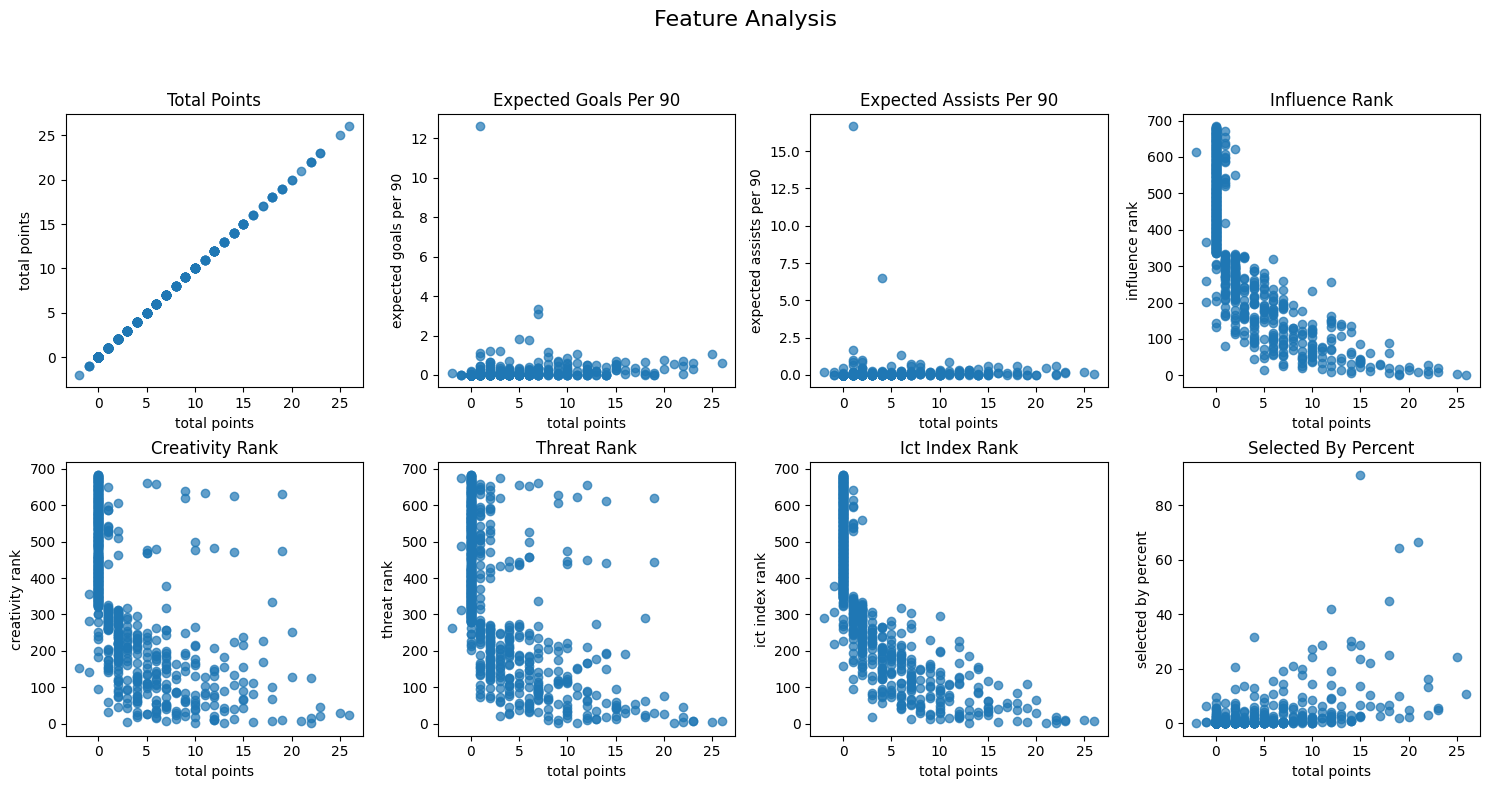

In [6]:
# Define the layout of subplots
num_rows = 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle("Feature Analysis", fontsize=16)

for i, variable in enumerate(var_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Create the subplot for the current variable
    ax.scatter(df['total_points'],df[variable], alpha=0.7)
    ax.set_title(variable.replace('_', ' ').title())
    ax.set_xlabel("total points")
    ax.set_ylabel(variable.replace('_', ' '))

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

## Quick Insight 1 

These plots show the relationships between variables a lot clearer, shedding light on the intricate connections involving the `total_points` variable:
 - As selected by percentage increases the total_points tends to increase 
 - As the influence rank decreases the total_points increases

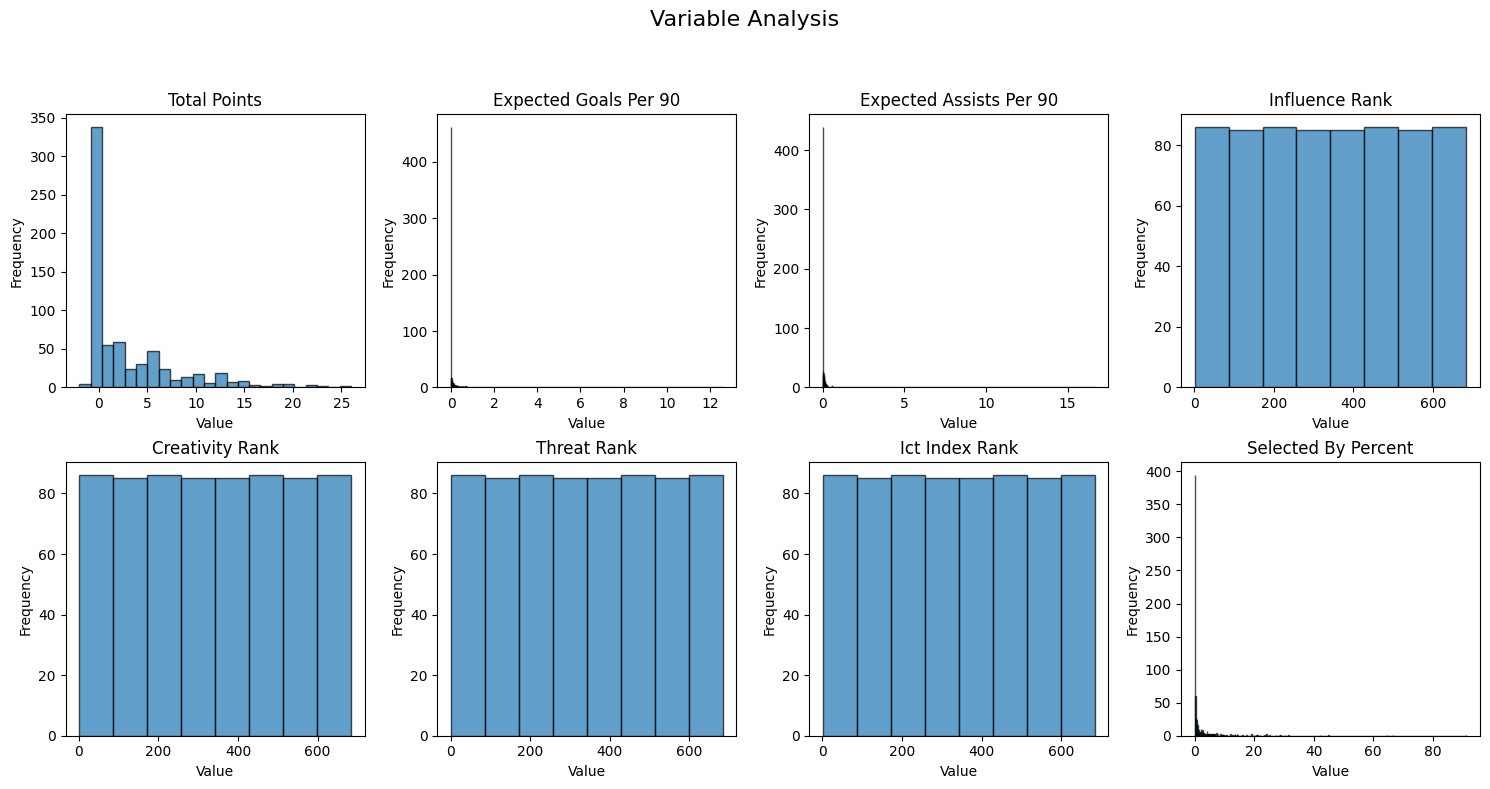

In [7]:
# Define the layout of subplots
num_rows = 2
num_cols = 4

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle("Variable Analysis", fontsize=16)

for i, variable in enumerate(var_list):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    # Calculate bin size using Freedman-Diaconis rule
    iqr = np.percentile(df[variable], 75) - np.percentile(df[variable], 25)
    bin_width = 2 * iqr * math.pow(len(df[variable]), -1/3)
    num_bins = int((max(df[variable]) - min(df[variable])) / bin_width)

    # Create the subplot for the current variable
    ax.hist(df[variable], bins=num_bins, edgecolor='black', alpha=0.7)
    ax.set_title(variable.replace('_', ' ').title())
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the plots
plt.show()

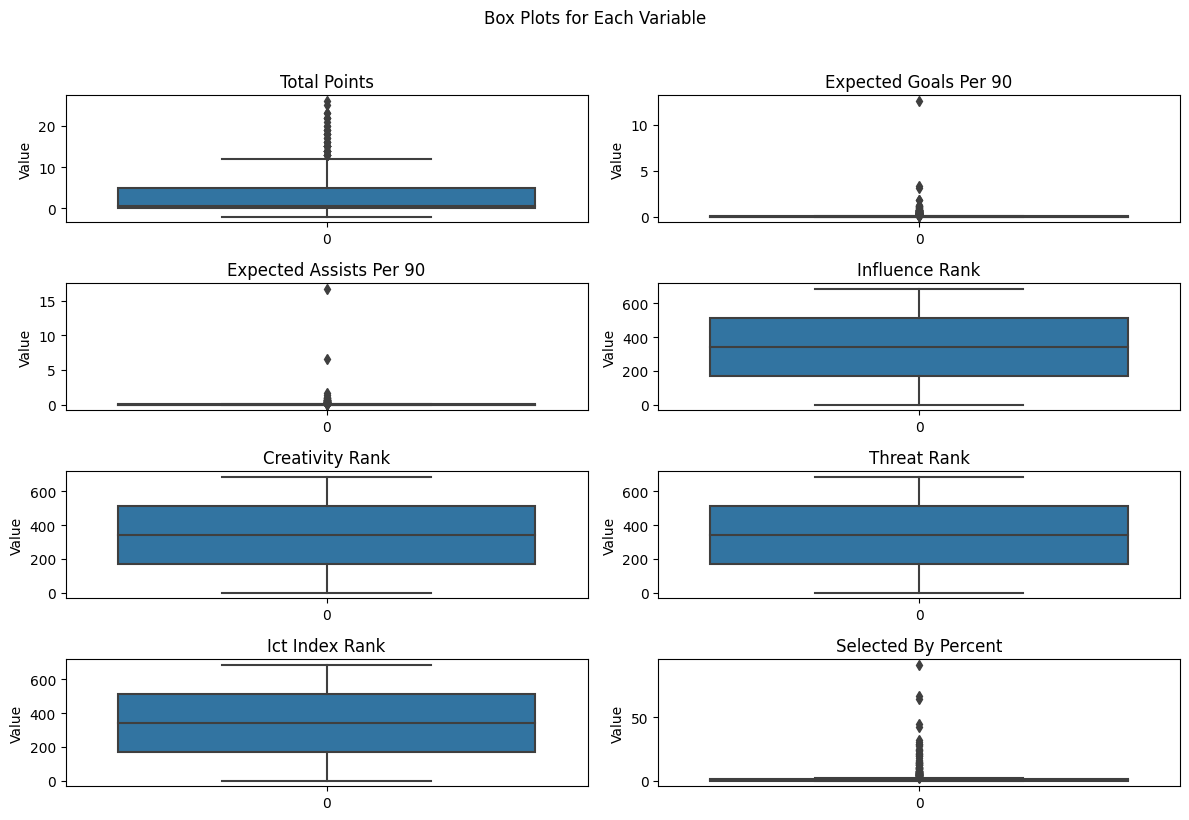

In [8]:
# Calculate the number of rows and columns for subplots
num_rows = (len(var_list) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
fig.suptitle("Box Plots for Each Variable", y=1.02)

# Flatten the axes array
axes = axes.flatten()

# Create box plots for each variable in subplots
for i, variable in enumerate(var_list):
    sns.boxplot(data=df[variable], ax=axes[i])
    axes[i].set_title(variable.replace('_', ' ').title())
    axes[i].set_ylabel("Value")

# Hide any extra subplots
for j in range(len(var_list), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Quick insight 2 

While observing the distribution of individual variables is insightful, it becomes evident that the data's wild fluctuations obscure straightforward analysis. 

In such intricate cases:

- The data's unpredictable nature leads to a complex choreography, defying easy categorization.


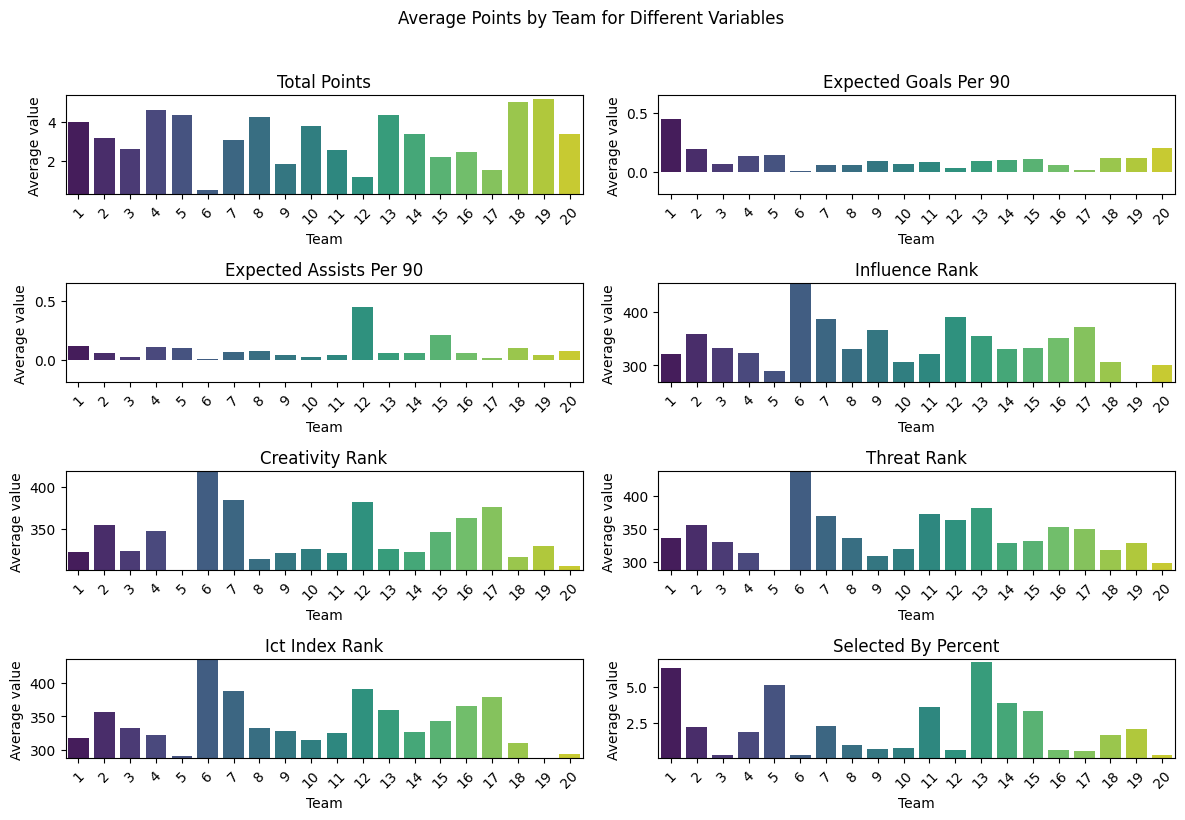

In [9]:
# Calculate average points for each variable by team
team_avg_points = df.groupby("team")[var_list].mean().reset_index()

# Define the layout of subplots
num_rows = (len(var_list) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8),sharey=False)
fig.suptitle("Average Points by Team for Different Variables", y=1.02)

# Flatten the axes array
axes = axes.flatten()

# Create bar plots for each variable in subplots
for i, variable in enumerate(var_list):
    sns.barplot(data=team_avg_points, x="team", y=variable, palette="viridis", ax=axes[i])
    axes[i].set_title(variable.replace('_', ' ').title())
    axes[i].set_xlabel("Team")
    axes[i].set_ylabel("Average value")
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, df[variable].max() * 1.2)

    # Adjust y-axis limits as needed
    max_value = team_avg_points[variable].max()
    min_value = team_avg_points[variable].min()
    axes[i].set_ylim(min_value - 0.2, max_value + 0.2)

# Hide any extra subplots
for j in range(len(var_list), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Team Insights

Taking a closer look, Team 19 stands out in an intriguing way. While having relatively low average scores in influence, creativity, and threat, their total points are remarkably high.

This observation prompts a fascinating consideration of the interplay between these variables. Team 19's unique blend of attributes suggests a distinct strategy that leads to good overall performance.

This example underscores the diversity of pathways to success within the dataset, reminding us that effective analysis goes beyond conventional patterns and embraces the unexpected correlations that shape outcomes.

Now most people would think that this team may be Man City or Arsenal given current form but surprisingly it is West Ham at the time of writing this!

In [10]:
print("The team with the highest average point is: "+df[df.team == 19]['team_name'].iloc[0])

The team with the highest average point is: West Ham


## 2. Getting Extra Features

Now that we've gotten acquainted with the data and gained insights into each variable, it's clear that we've got some useful info, but there's potential for more. Expanding our view could give us a better shot at predicting the top-performing team.

So, let's shift our focus to historical data, player stats, and fixture rankings. These sources promise some interesting insights that could really spice up our journey ahead. 

With these extra layers of information, we're set to uncover more trends to boost our predictive model's capabilities.

Our first step is to use the function **get_curated_player_data** this will retreive all the data we need

**NOTE** The function can take some time to run (Around 8 mins on average in my tets) so go make yourself a cup of tea/coffee/whiskey whilsts its doing its thing. ALternativly you can work with the csv version I have in the data folder named curated.csv

In [11]:
# Reads in the data from API
# df = get_curated_player_data()
# Reads in the data from CSV
df = pd.read_csv('data/curated.csv')

The extra data that we now have is some very useful that collected about each player for last season. Lets take a look at some of the extra features we have and get familar with them

In [12]:
df.columns

Index(['Unnamed: 0', 'id', 'first_name', 'web_name', 'team', 'team_code',
       'now_cost', 'photo', 'total_points', 'value_season', 'minutes',
       'ict_index_rank', 'element_type', 'bps', 'influence', 'creativity',
       'threat', 'goals_scored', 'expected_goals', 'assists',
       'expected_assists', 'form', 'selected_by_percent', 'selected_rank',
       'chance_of_playing_next_round', 'chance_of_playing_this_round',
       'expected_goals_per_90', 'expected_assists_per_90', 'influence_rank',
       'creativity_rank', 'threat_rank', 'position', 'team_name',
       'average_points', 'average_minutes', 'avg_points_per_min',
       'goals_scored_last_season', 'goals_conceded_last_season',
       'assists_last_season', 'minutes_last_season',
       'clean_sheets_last_season', 'total_points_last_season',
       'ict_index_last_season', 'influence_last_season', 'threat_last_season',
       'creativity_last_season', 'red_cards_last_season',
       'yellow_cards_last_season', 'starts_la

### New Features
- **average_points**: The average number of points a player scored per match in the last 3 seasons.
- **average_minutes**: The average number of minutes a player spent on the field per match in the last 3 seasons.
- **avg_points_per_min**: The average points a player earned per minute played in the last 3 seasons.
- **goals_scored_last_season**: The total number of goals a player scored in the previous season.
- **goals_conceded_last_season**: The total number of goals a player's team conceded in the previous season.
- **assists_last_season**: The total number of assists a player provided to their teammates in the previous season.
- **minutes_last_season**: The total number of minutes a player played in the previous season.
- **clean_sheets_last_season**: The total number of matches in which a player's team kept a clean sheet (no goals conceded) in the previous season.
- **total_points_last_season**: The total number of points a player earned in the form of goals, assists, and other performance metrics in the previous season.
- **ict_index_last_season**: The Index of Influence, Creativity and Threat (ICT) measures a player's overall performance, combining attributes like goals, assists, and influence on the game, from the previous season.
- **red_cards_last_season**: The total number of red cards a player received in the previous season.
- **yellow_cards_last_season**: The total number of yellow cards a player received in the previous season.
- **starts_last_season**: The total number of matches a player started in the previous season.
- **saves_last_season**: The total number of saves a player (usually a goalkeeper) made in the previous season.
- **penalties_saved_last_season**: The total number of penalties a player saved as a goalkeeper in the previous season.
- **penalties_missed_last_season**: The total number of penalties a player missed (when taking a penalty kick) in the previous season.
- **average_win_perc_first_10**: The average win percentage of the player's team in the first 10 matches of the current season.

Now that we have this lets begin to plot the data and build up similar plots to last time with this extra information

<AxesSubplot: >

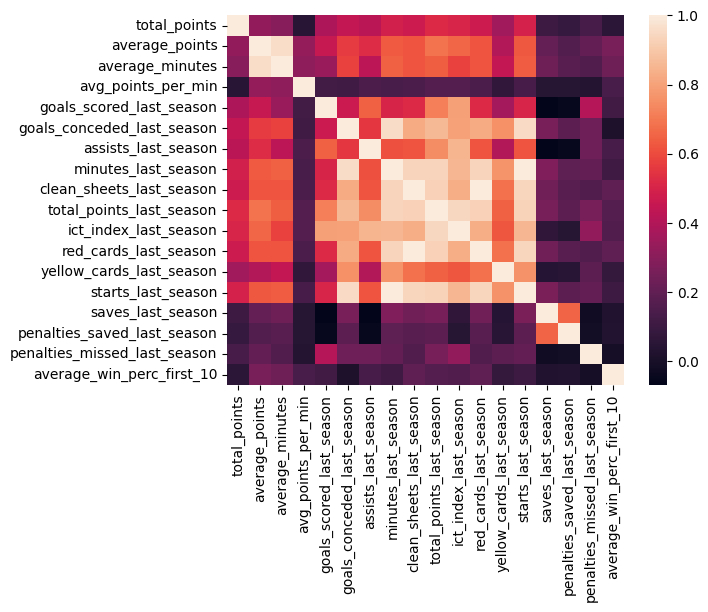

In [13]:
var_list = ['total_points','average_points', 'average_minutes', 'avg_points_per_min',
            'goals_scored_last_season', 'goals_conceded_last_season','assists_last_season', 'minutes_last_season','clean_sheets_last_season', 
            'total_points_last_season','ict_index_last_season', 'red_cards_last_season','yellow_cards_last_season', 'starts_last_season', 
            'saves_last_season','penalties_saved_last_season', 'penalties_missed_last_season','average_win_perc_first_10']
sns.heatmap(df[var_list].corr())

Looking at this plot, some interesting insights come to light. It appears that features I calculated, like `average_points`, `average_minutes`, and `average_points_per_min`, don't strongly correlate with the total points earned so far this season.

On a different note, it's noticeable that stats such as `total_points_last_season` and `starts_last_season` exhibit a more evident correlation. To better observe these correlation values, let's simplify the feature set in the plot.

Another consideration is narrowing down our dataframe to outfield players for now. Goalkeepers typically contribute fewer points, unless they excel in areas like consistent clean sheets or the occasional penalty save.


<AxesSubplot: >

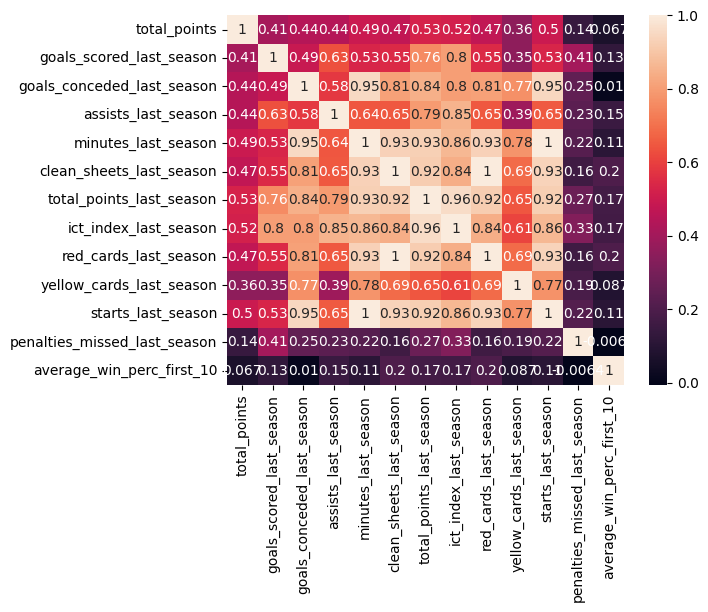

In [14]:
filterdf = df[df.position != "Goalkeeper" ]

var_list = ['total_points','goals_scored_last_season', 'goals_conceded_last_season','assists_last_season', 'minutes_last_season','clean_sheets_last_season', 
            'total_points_last_season','ict_index_last_season', 'red_cards_last_season','yellow_cards_last_season', 'starts_last_season','penalties_missed_last_season','average_win_perc_first_10']
sns.heatmap(filterdf[var_list].corr(),annot=True)

In [15]:
filterdf.position.drop_duplicates()

0      Attacker
1      Defender
2    Midfielder
Name: position, dtype: object

FPL has certain rules about how points are earned: 
| Action                                       | Points |
|----------------------------------------------|--------|
| For playing up to 60 minutes                | 1      |
| For playing 60 minutes or more              | 2      |
| For each goal scored by a goalkeeper or defender | 6      |
| For each goal scored by a midfielder        | 5      |
| For each goal scored by a forward           | 4      |
| For each assist for a goal                  | 3      |
| For a clean sheet by a goalkeeper or defender | 4      |
| For a clean sheet by a midfielder           | 1      |
| For every 3 shots saved by a goalkeeper     | 1      |
| For each penalty save                       | 5      |
| For each penalty miss                       | -2     |
| Bonus points for the best players in a match| 1-3    |
| For every 2 goals conceded by a goalkeeper or defender | -1     |
| For each yellow card                        | -1     |
| For each red card                           | -3     |
| For each own goal                           | -2     |

Because much of this is dependent on different positions, it would be beneficial for us to create subplots for each position. This will help us better grasp the nuances and improve our understanding.


In [16]:
df.position.drop_duplicates()

0       Attacker
1       Defender
2     Midfielder
16    Goalkeeper
Name: position, dtype: object

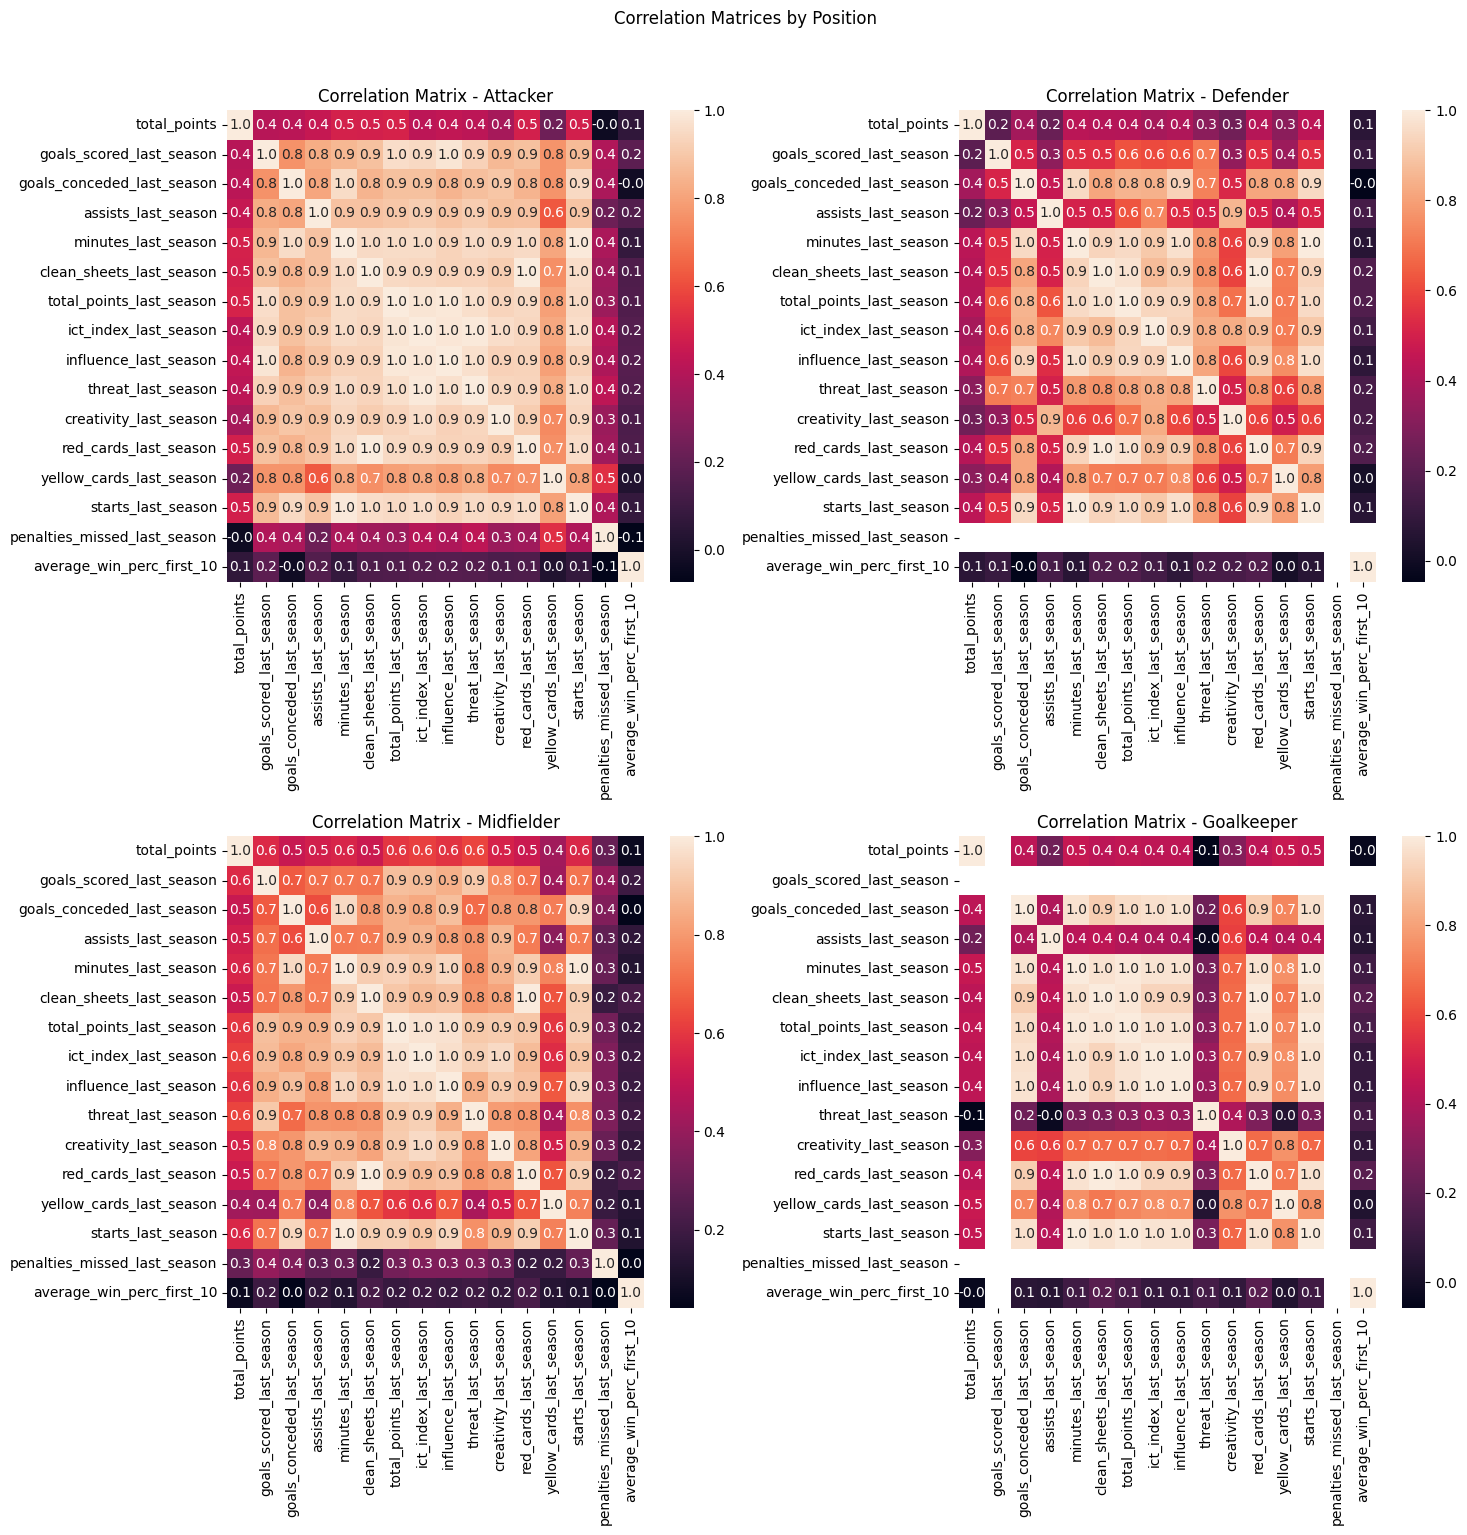

In [17]:
positions = list(df.position.drop_duplicates())
var_list = ['total_points','position','goals_scored_last_season', 'goals_conceded_last_season','assists_last_season', 'minutes_last_season','clean_sheets_last_season', 
            'total_points_last_season','ict_index_last_season','influence_last_season','threat_last_season','creativity_last_season', 'red_cards_last_season','yellow_cards_last_season', 'starts_last_season','penalties_missed_last_season','average_win_perc_first_10']
filterdf = df[var_list]
position_dataframes = {position: filterdf[filterdf['position'] == position] for position in positions}

# Plotting subplots for correlation matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("Correlation Matrices by Position", y=1.02)

for i, (position, current_df) in enumerate(position_dataframes.items()):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    corr_matrix = current_df.corr()
    sns.heatmap(corr_matrix,annot=True,fmt=".1f", ax=ax)
    ax.set_title(f'Correlation Matrix - {position.capitalize()}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Taking a closer look, it's apparent that midfielders' points this season seem to have a stronger connection with their stats from the previous season. This suggests a meaningful link between their past performance and current points.

As for attackers and defenders, there's still a correlation, but it's not as prominent as with midfielders. This hints that their historical stats do play a role in their current points, but it might not be as noticeable.

It may be worth us in our model potentially looking at spending more money in the midfield area vs attackers as that is where we should be able to maximize our points.


## Modelling

Time to pick out the features that'll be our go-to for now. Let's keep it simple and focus on a handful of important attributes.

From Part 1, two stand out: `influence` and `selected_by_percent`.

In Part 2, we've got some more to add to the mix:
- `total_points_last_season`
- `ict_index_last_season`
- `goals_scored_last_season`
- `influence_last_season`

These features make up a solid starting point. They cover the current season's performance and toss in some historical data from the previous season for good measure.

We've actually prepared some ready-to-use models to make things easier for you, so you don't have to worry about the hassle of building them from scratch. The approach I've taken is a simple yet powerful method known as linear programming.

Given our many constraints and the need to optimize and minimize specific features, linear programming makes a lot of sense. Instead of going for more complex options, we decided to use the Pulp library to speed things up. This was a smart choice, especially considering the large number of features we're dealing with. The simplex algorithm/brute force may be something you are familar with but this approach is much more effictive and time efficient!

Before we start our modelling there are a few things I want to add in for consideration:

1. I have included a bench as the model doesn't have a concept of who is on the bench and who isn't and therfore cannot gain points 
2. I have also added a few players in who I think are great picks in general like Haaland


Just check out the base models performance for week 1 below (P.s. if you change the gameweek_num variable you can check how it performs for later gameweeks :) ):

In [28]:
gameweek_num = 4
base_selected = base_team(df,[33,139,255,352,355,524])
compare_performance(base_selected,gameweek_num,{355: 2},{33: 1, 255: 1, 139: 1, 524: 1})

Models Team Performance: 72
Best Team Performance: 142


Okay so the base model seemed to perform really well on week 1 with a score of 68 which isn't too bad considering this is just looking at optimizing for the total points last season, Now lets try and use the variable_team function to try and create a stronger performing side.

To do this we need to pass some extra values into the function, Using the var_dict variable we can pass a dictionary of the features we want to use in the model and the co-efficient we want to construct them with. 

Just a reminder but here is what our constaints look like as a mathematical formula:

HINT: Selected is an array of the players we have selected and i is the index of the player 

#### Budget Constraints
```
Σ(selected[i] * cost[i]) ≤ 1000
for all i
 ```
#### Positon Constraints 

**Goalkeeper Constraint:**  
  Select exactly 2 goalkeepers:
  ```
  Σ(selected[i] if position[i] == 'Goalkeeper') = 2
  ```
**Defender Constraint:**  
  Select exactly 5 defenders:
  ```
  Σ(selected[i] if position[i] == 'Defender') = 5
  ```
 **Midfielder Constraint:**  
  Select exactly 5 midfielders:
  ```
  Σ(selected[i] if position[i] == 'Midfielder') = 5
  ```
**Attacker Constraint:**  
  Select exactly 3 attackers:
  ```
  Σ(selected[i] if position[i] == 'Attacker') = 3
  ```
**Maximum Players from the Same Team Constraint:**



Limit the number of players from the same team to \(M\) for each unique team, where \(M\) is the maximum number of players allowed from the same team:


In [42]:
var_dict = {
    'selected_by_percent': 1,
    'ict_index_last_season':3,
    'influence_rank':-2,
    'goals_scored_last_season':1,
    'influence_last_season':1,
    'total_points_last_season':1
}

In [43]:
team_selected = variable_team(df,var_dict,[33,139,255,352,355,524])
compare_performance(team_selected,gameweek_num,{355: 2},{33: 1, 255: 1, 139: 1, 524: 1})

Models Team Performance: 79
Best Team Performance: 142
